In [1]:
import numpy as np

In [2]:
import scipy

In [3]:
scipy.stats.uniform.rvs(size=10)

array([0.10167485, 0.27699962, 0.53778638, 0.32670015, 0.45231816,
       0.80392431, 0.8498633 , 0.79264753, 0.03934189, 0.1413387 ])

In [4]:
# function to pick n random points in a cylinder
def random_points_in_cylinder(n, radius, height):
    points = np.zeros((n, 3))
    for i in range(n):
        theta = np.random.uniform(0, 2*np.pi)
        z = np.random.uniform(0, height)
        r = np.random.uniform(0, radius)
        points[i] = [r*np.cos(theta), r*np.sin(theta), z]
    return points

In [5]:
# Example usage of random_point_in_cylinder function
radius = 5
height = 10
n = 2
points = random_points_in_cylinder(n, radius, height)
print(f"Random points in cylinder with radius {radius} and height {height}: {points}")

Random points in cylinder with radius 5 and height 10: [[ 4.22233532e-03 -2.66864059e-02  1.77278856e+00]
 [-1.26439913e+00  3.61935409e-01  8.31274066e+00]]


In [6]:
def box_char_func_np(x, x0, x1, y0, y1, z0, z1):
    """
    Determines if points in a NumPy array are within a specified 3D box.

    Parameters:
    x (np.ndarray): A 2D NumPy array of shape (n, 3) where each row represents a point in 3D space.
    x0 (float): The minimum x-coordinate of the box.
    x1 (float): The maximum x-coordinate of the box.
    y0 (float): The minimum y-coordinate of the box.
    y1 (float): The maximum y-coordinate of the box.
    z0 (float): The minimum z-coordinate of the box.
    z1 (float): The maximum z-coordinate of the box.

    Returns:
    np.ndarray: A 1D boolean array of length n where each element is True if the corresponding point is within the box, and False otherwise.
    """
    return np.logical_and.reduce((x[:, 0] >= x0, x[:, 0] <= x1, x[:, 1] >= y0, x[:, 1] <= y1, x[:, 2] >= z0, x[:, 2] <= z1))


In [7]:
def unif_concentration(x, a):
    """
    Generates a uniform concentration array.

    Parameters:
    x (numpy.ndarray): An array whose shape will be used to determine the size of the output array.
    a (float): The value to fill the output array with.

    Returns:
    numpy.ndarray: An array of the same length as the first dimension of `x`, filled with the value `a`.
    """
    return np.full(x.shape[0], a)

In [8]:
unif_concentration(points, .1)*box_char_func_np(points, -1, 1, -1, 1, 0, 1)

array([0., 0.])

In [9]:
points[:, 0]<5

array([ True,  True])

In [10]:
np.logical_and.reduce((points[:, 0] >= -1, points[:, 0] <= 1, points[:, 1] >= -1, points[:, 1] <= 1, points[:, 2] >= 0, points[:, 2] <= 1))

array([False, False])

In [11]:
def clip(x, min_val, max_val):
    """
    Clips (limits) the values in an array.

    Parameters:
    x (numpy.ndarray): The array to clip.
    min_val (float): The minimum value to allow in the array.
    max_val (float): The maximum value to allow in the array.

    Returns:
    numpy.ndarray: A new array clipped so that all values are between `min_val` and `max_val`.
    """
    return np.clip(x, min_val, max_val)

In [12]:
points

array([[ 4.22233532e-03, -2.66864059e-02,  1.77278856e+00],
       [-1.26439913e+00,  3.61935409e-01,  8.31274066e+00]])

In [13]:
def vertical_linear_gradient_dist(x, z_0, z_1, c_0, c_1):
    """
    Generates a linear gradient in the vertical direction.

    Parameters:
    x (numpy.ndarray): A 2D NumPy array of shape (n, 3) where each row represents a point in 3D space.
    z_0 (float): The minimum z-coordinate of the gradient.
    z_1 (float): The maximum z-coordinate of the gradient.
    c_0 (float): The value of the gradient at z=z_0.
    c_1 (float): The value of the gradient at z=z_1.

    Returns:
    numpy.ndarray: An array of length n with the gradient values.
    """
    _ = c_0 + (c_1 - c_0) * (x[:, 2] - z_0) / (z_1 - z_0)
    return np.clip(_, c_0, c_1)

In [14]:
vertical_linear_gradient_dist(points, 0, 10, 0, 1)

array([0.17727886, 0.83127407])

Step 1: Define the field

In [15]:

soil_conc_a = .1

soil_x0 = -1
soil_x1 = 1
soil_y0 = -1
soil_y1 = 1
soil_z0 = -2
soil_z1 = 0

soil_conc_func = lambda x: unif_concentration(x, soil_conc_a)*box_char_func_np(x, soil_x0, soil_x1, soil_y0, soil_y1, soil_z0, soil_z1)

In [16]:
# picking random points on the soil surface
_n = 10
# _x = np.random.uniform(soil_x0, soil_x1, _n)
_x = np.linspace(soil_x0, soil_x1, _n+2)[1:-1]
# _y = np.random.uniform(soil_y0, soil_y1, _n)
_y = np.linspace(soil_y0, soil_y1, _n+2)[1:-1]
_xx, _yy = np.meshgrid(_x, _y)
_xx = _xx.flatten()
_yy = _yy.flatten()
_z = np.zeros(len(_xx))
core_locs = np.column_stack((_xx, _yy, _z))

In [17]:
import matplotlib.pyplot as plt

/home/jac2462@uta.edu/.local/lib/python3.10/site-packages/matplotlib/projections/__init__.py:63: UserWarning: Unable to import Axes3D. This may be due to multiple versions of Matplotlib being installed (e.g. as a system package and as a pip package). As a result, the 3D projection is not available.
  warnings.warn("Unable to import Axes3D. This may be due to multiple versions of "


In [18]:
core_height = 1
core_radius = .05

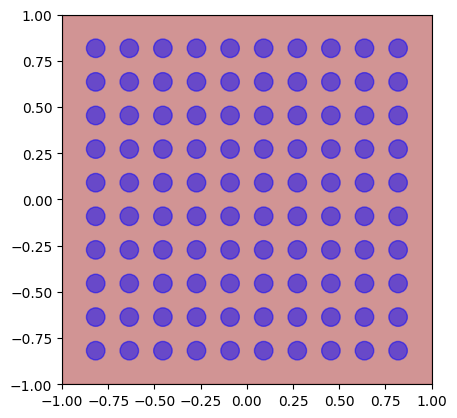

In [19]:
# draw circle area for core
fig = plt.figure()
ax = fig.add_subplot(111)
# plt.scatter(_xx, _yy)
# draw rectangle area for soil
plt.fill_between([soil_x0, soil_x1], soil_y0, soil_y1, color='brown', alpha=0.5)
# draw circle area for core
for _x, _y in zip(_xx, _yy):
    # print(_x)
    circle = plt.Circle((_x, _y), core_radius, color='blue', alpha=0.5)
    ax.add_artist(circle)
ax.set_xlim(-1, 1)
ax.set_ylim(-1, 1)
ax.set_aspect('equal')

# Show plot
plt.show()

In [25]:
# at each core location, pick n random points in the core
n = 10
n_cores = len(core_locs)
core_points = np.zeros((n*len(core_locs), 3))
for i, loc in enumerate(core_locs):
    core_points[i*n:(i+1)*n] = random_points_in_cylinder(n, core_radius, -core_height) + loc

In [30]:
core_points_conc = soil_conc_func(core_points)

# calculate the average concentration at each core location
core_conc = np.zeros(n_cores)
for i in range(n_cores):
    core_conc[i] = np.mean(core_points_conc[i*n:(i+1)*n])

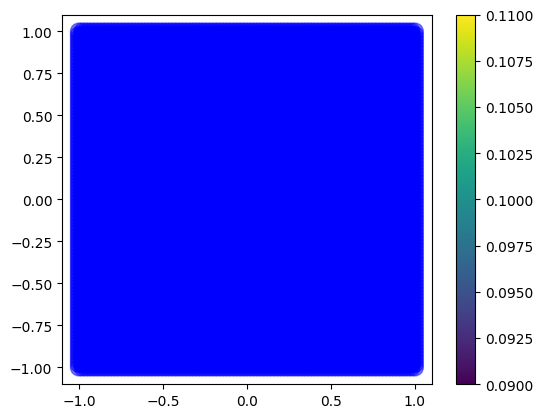

In [34]:

fig = plt.figure()
ax = fig.add_subplot(111)
# plt.scatter(_xx, _yy)
plt.scatter(_xx.flatten(), _yy.flatten(), c=soil_conc, cmap='viridis')
plt.colorbar()
# draw rectangle area for soil
plt.fill_between([soil_x0, soil_x1], soil_y0, soil_y1, color='brown', alpha=0.5)
# draw circle area for core
for _x, _y in zip(_xx.flatten(), _yy.flatten()):
    # print(_x)
    circle = plt.Circle((_x, _y), core_radius, color='blue', alpha=0.5)
    ax.add_artist(circle)
ax.set_xlim(-1.1, 1.1)
ax.set_ylim(-1.1, 1.1)
ax.set_aspect('equal')

# Show plot
plt.show()
